# 因子分析

In [1]:
!pip install japanize_matplotlib

In [2]:
from sklearn import datasets    
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd  

In [3]:
#データの読み込み
wine_data = datasets.load_wine(as_frame=True).frame #ワインデータセットの読み込み
df = wine_data.drop('target',axis=1)  #ワインの種類を示す変数を削除
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
#データの標準化
df_std = df.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df_std

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


In [5]:
#相関行列を求める
df_std_corr = df_std.corr()

#固有値を求める
ev = np.linalg.eigvals(df_std_corr)
ev_sorted = sorted(ev,reverse=True)

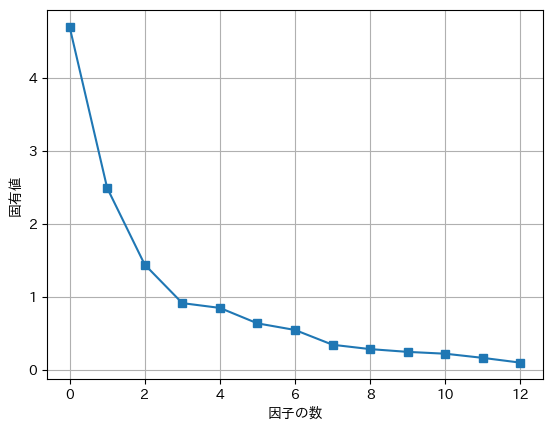

In [6]:
#スクリープロットの描画
#固有値をプロット
plt.plot(ev_sorted, 's-') 

# 軸名を指定
plt.xlabel("因子の数")
plt.ylabel("固有値")

plt.grid()
plt.show()

In [7]:
!pip install factor_analyzer

In [8]:
from factor_analyzer import FactorAnalyzer

# 因子分析の実行
fa = FactorAnalyzer(n_factors=3, rotation="promax")
fa.fit(df_std)

FactorAnalyzer(rotation_kwargs={})

In [9]:
# 因子負荷量，共通性の表示
loadings_df = pd.DataFrame(fa.loadings_, columns=["第１因子", "第２因子","第3因子"]) #fa.loadingsで因子負荷量を算出
loadings_df.index = df_std.columns
loadings_df["共通性"] = fa.get_communalities() #共通性の算出
loadings_df

,第１因子,第２因子,第3因子,共通性
alcohol,-0.084919,0.828240,-0.123595,0.708468
malic_acid,-0.491256,0.134425,0.164368,0.286419
ash,0.122195,0.220916,0.743625,0.616714
alcalinity_of_ash,-0.132584,-0.375304,0.771409,0.753503
magnesium,0.145143,0.369529,0.120326,0.172097
total_phenols,0.801492,0.231137,0.120158,0.710252
flavanoids,0.937470,0.140878,0.123795,0.914022
nonflavanoid_phenols,-0.478164,-0.136055,0.197719,0.286245
proanthocyanins,0.596685,0.143204,0.084610,0.383699
color_intensity,-0.526873,0.779382,0.007136,0.885082


### 結果の解釈

因子負荷量とは、各因子と各変数との相関係数です。つまり関係性が深い変数ほど値が大きくなり、-1から1の間の値を取ります。

共通性とは、各変数からみた因子負荷量の合計値です。つまり共通性が高いほど分析により算出された因子と深く関係していることになります。逆に、共通性が低い変数は、独自因子の割合が高いことを意味します。

因子1：ポリフェノール量
因子2：アルコール量
因子3：ミネラル量

### 主成分分析との類似点

どちらも次元（変数の数）の削減が大きな目標となっている

### 主成分分析との相違点

主成分分析は，分散が最大になる方向に軸をひいて，新たな変数をつくり，より少ない変数に圧縮する方法でしたね。この少ない変数で情報の大部分を表現する主成分分析の特徴は画像圧縮のイメージで捉えるとわかりやすいです。もとの画像のデータから少ない変数に圧縮すると，情報を捨てた分だけ画像は多少粗くなります。情報の損失が許容できる範囲におさまるように，固有値の大きな主成分から選んでいきます。

因子分析とはどんな特徴をもつものでしょうか。例えば，企業の採用試験などで実施される性格を診断するアンケートを思い浮かべてみましょう。「はじめて話す人であっても打ち解けることができる。Yes or No？」みたいな質問がたくさん並んでいて，その中には表現を変えただけで同じようなことを言っている項目もありますよね。この場合，一つひとつのアンケート項目が変数であって，複数の項目に「社交性」のような共通の因子が働いていると考えることができます。このように，たくさんの変数に背後から影響を与え，変数どうしの相関をつくりだしている仮想的な変数を見つけ出して，データの構造を明らかにしようとするのが因子分析です。

### プロマックス回転

### 因子パターン行列